In [1]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#setting plotsize
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [3]:
#Reading csv 
cd=pd.read_csv('cars_sampled.csv')

In [4]:
#Deep copy of data
cars=cd.copy()

In [5]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   dateCrawled          50001 non-null  object
 1   name                 50001 non-null  object
 2   seller               50001 non-null  object
 3   offerType            50001 non-null  object
 4   price                50001 non-null  int64 
 5   abtest               50001 non-null  object
 6   vehicleType          44813 non-null  object
 7   yearOfRegistration   50001 non-null  int64 
 8   gearbox              47177 non-null  object
 9   powerPS              50001 non-null  int64 
 10  model                47243 non-null  object
 11  kilometer            50001 non-null  int64 
 12  monthOfRegistration  50001 non-null  int64 
 13  fuelType             45498 non-null  object
 14  brand                50001 non-null  object
 15  notRepairedDamage    40285 non-null  object
 16  date

In [6]:
cars.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,5.000100e+04,50001.000000,50001.000000,50001.000000,50001.000000,50001.000000
mean,6.559865e+03,2005.544229,116.496130,125613.687726,5.743725,50775.216696
std,8.581847e+04,122.991832,230.567709,40205.234483,3.711345,25743.701933
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,1067.000000
25%,1.150000e+03,1999.000000,69.000000,125000.000000,3.000000,30559.000000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,49504.000000
75%,7.190000e+03,2008.000000,150.000000,150000.000000,9.000000,71404.000000
max,1.234568e+07,9999.000000,19312.000000,150000.000000,12.000000,99998.000000


In [7]:
#Limiting to 3 decimal places
pd.set_option('display.float_format',lambda x:'%.3f'%x)
cars.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,50001.000,50001.000,50001.000,50001.000,50001.000,50001.000
mean,6559.865,2005.544,116.496,125613.688,5.744,50775.217
std,85818.470,122.992,230.568,40205.234,3.711,25743.702
min,0.000,1000.000,0.000,5000.000,0.000,1067.000
25%,1150.000,1999.000,69.000,125000.000,3.000,30559.000
50%,2950.000,2003.000,105.000,150000.000,6.000,49504.000
75%,7190.000,2008.000,150.000,150000.000,9.000,71404.000
max,12345678.000,9999.000,19312.000,150000.000,12.000,99998.000


In [8]:
#To display max set of columns
pd.set_option('display.max_columns',500)

In [9]:
cars.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,50001.000,50001.000,50001.000,50001.000,50001.000,50001.000
mean,6559.865,2005.544,116.496,125613.688,5.744,50775.217
std,85818.470,122.992,230.568,40205.234,3.711,25743.702
min,0.000,1000.000,0.000,5000.000,0.000,1067.000
25%,1150.000,1999.000,69.000,125000.000,3.000,30559.000
50%,2950.000,2003.000,105.000,150000.000,6.000,49504.000
75%,7190.000,2008.000,150.000,150000.000,9.000,71404.000
max,12345678.000,9999.000,19312.000,150000.000,12.000,99998.000


In [10]:
#Dropping unwanted columns
c=['name','dateCrawled','dateCreated','postalCode','lastSeen']
cars=cars.drop(columns=c,axis=1)

In [11]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   seller               50001 non-null  object
 1   offerType            50001 non-null  object
 2   price                50001 non-null  int64 
 3   abtest               50001 non-null  object
 4   vehicleType          44813 non-null  object
 5   yearOfRegistration   50001 non-null  int64 
 6   gearbox              47177 non-null  object
 7   powerPS              50001 non-null  int64 
 8   model                47243 non-null  object
 9   kilometer            50001 non-null  int64 
 10  monthOfRegistration  50001 non-null  int64 
 11  fuelType             45498 non-null  object
 12  brand                50001 non-null  object
 13  notRepairedDamage    40285 non-null  object
dtypes: int64(5), object(9)
memory usage: 5.3+ MB


In [12]:
#Remove duplicates only
cars.drop_duplicates(keep='first',inplace=True)
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49531 entries, 0 to 50000
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   seller               49531 non-null  object
 1   offerType            49531 non-null  object
 2   price                49531 non-null  int64 
 3   abtest               49531 non-null  object
 4   vehicleType          44379 non-null  object
 5   yearOfRegistration   49531 non-null  int64 
 6   gearbox              46766 non-null  object
 7   powerPS              49531 non-null  int64 
 8   model                46801 non-null  object
 9   kilometer            49531 non-null  int64 
 10  monthOfRegistration  49531 non-null  int64 
 11  fuelType             45064 non-null  object
 12  brand                49531 non-null  object
 13  notRepairedDamage    39891 non-null  object
dtypes: int64(5), object(9)
memory usage: 5.7+ MB


In [13]:
#Missing values
cars.isna().sum()

seller                    0
offerType                 0
price                     0
abtest                    0
vehicleType            5152
yearOfRegistration        0
gearbox                2765
powerPS                   0
model                  2730
kilometer                 0
monthOfRegistration       0
fuelType               4467
brand                     0
notRepairedDamage      9640
dtype: int64

In [14]:
#Variable yearOfRegistration
cars['yearOfRegistration'].value_counts().sort_index()

1000     6
1255     1
1500     2
1910    14
1928     1
        ..
7500     1
7800     1
8500     1
8888     2
9999     7
Name: yearOfRegistration, Length: 97, dtype: int64

In [15]:
sum(cars['yearOfRegistration']>2020)

24

In [16]:
sum(cars['yearOfRegistration']<1950)

38

<AxesSubplot:xlabel='yearOfRegistration', ylabel='price'>

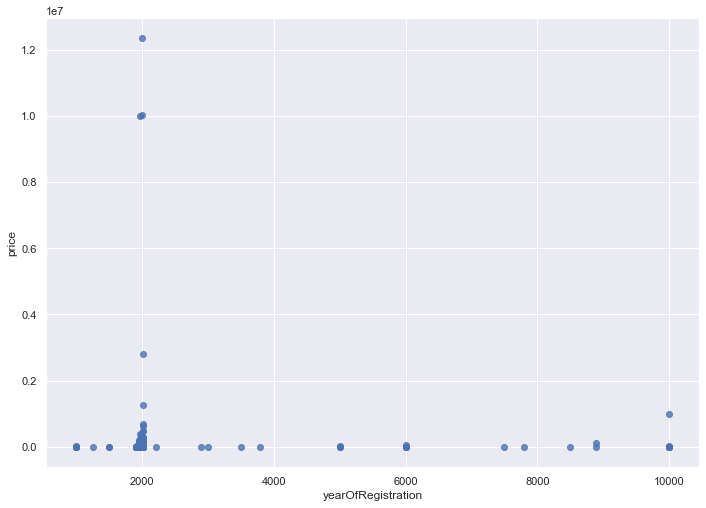

In [17]:
sns.regplot(x='yearOfRegistration',y='price',data=cars,scatter=True,fit_reg=False)

In [18]:
#variable price
cars['price'].value_counts().sort_index()

0           1415
1            172
2              1
3              1
5              4
            ... 
1250000        1
2795000        1
9999999        1
10010011       1
12345678       1
Name: price, Length: 2393, dtype: int64

<AxesSubplot:xlabel='price', ylabel='Density'>

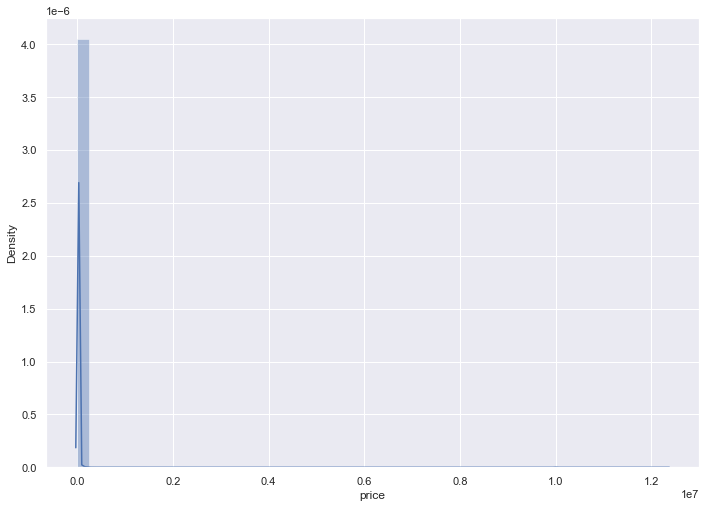

In [19]:
sns.distplot(cars['price'])

In [20]:
cars['price'].describe()

count      49531.000
mean        6567.220
std        86222.378
min            0.000
25%         1150.000
50%         2950.000
75%         7100.000
max     12345678.000
Name: price, dtype: float64

<AxesSubplot:ylabel='price'>

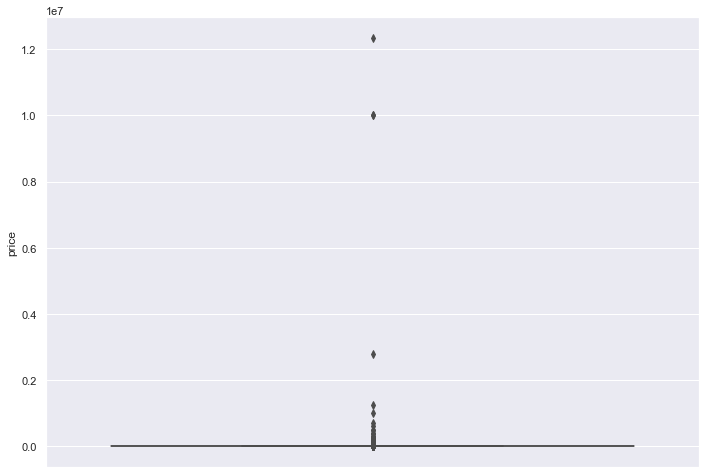

In [21]:
sns.boxplot(y=cars['price'])

In [22]:
sum(cars['price']>150000)

34

In [23]:
sum(cars['price']<100)

1748

In [24]:
#variable powerPS
cars['powerPS'].value_counts().sort_index()

0        5533
1           3
2           2
3           2
4           4
         ... 
15033       1
16011       1
16312       1
19211       1
19312       1
Name: powerPS, Length: 460, dtype: int64

<AxesSubplot:xlabel='powerPS', ylabel='Density'>

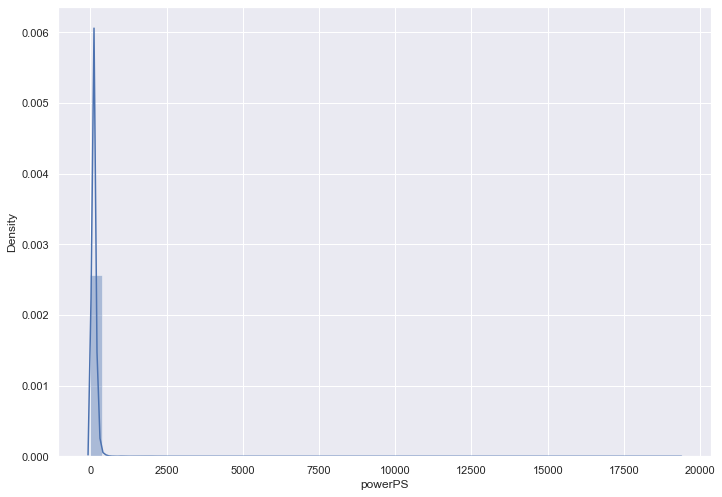

In [25]:
sns.distplot(cars['powerPS'])

<AxesSubplot:ylabel='powerPS'>

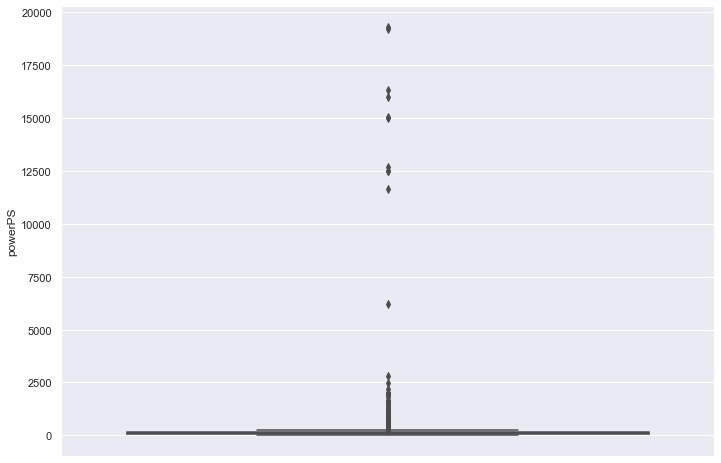

In [26]:
sns.boxplot(y=cars['powerPS'])

In [27]:
cars['powerPS'].describe()

count   49531.000
mean      116.501
std       231.536
min         0.000
25%        69.000
50%       105.000
75%       150.000
max     19312.000
Name: powerPS, dtype: float64

In [28]:
sum(cars['powerPS']>500)

115

In [29]:
sum(cars['powerPS']<10)

5565

<AxesSubplot:xlabel='powerPS', ylabel='price'>

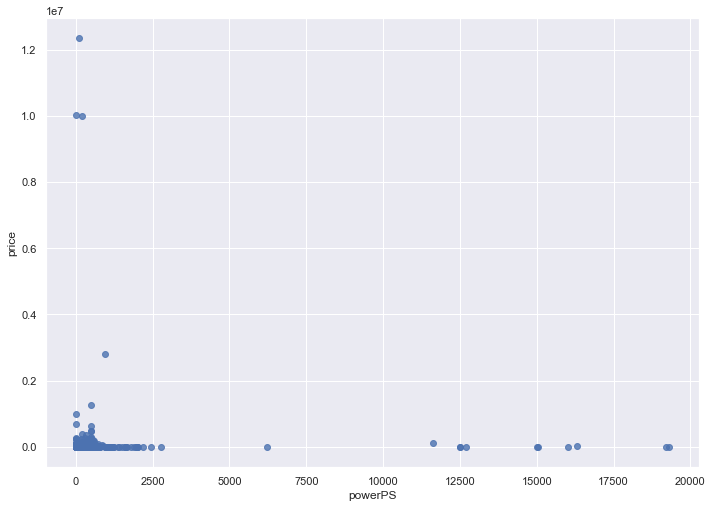

In [30]:
sns.regplot(scatter=True,x='powerPS',y='price',data=cars,fit_reg=False)

In [31]:
#Setting working range of variables yearOfRegistration,price,powerPS
cars=cars[(cars.yearOfRegistration<=2020)
         &(cars.yearOfRegistration>=1950)
         &(cars.price>=100)
         &(cars.price<=150000)
         &(cars.powerPS<=500)
         &(cars.powerPS>=10)]

In [32]:
#creating Age = yearOfRegistration + monthOfRegistration
cars['monthOfRegistration']/=12

In [33]:
cars['Age']=2020-cars['yearOfRegistration']+cars['monthOfRegistration']

In [34]:
cars['Age']=round(cars['Age'],2)

In [35]:
cars['Age'].describe()

count   42772.000
mean       16.873
std         7.093
min         2.000
25%        12.330
50%        16.830
75%        21.170
max        69.750
Name: Age, dtype: float64

In [36]:
#dropping year & month
cars=cars.drop(columns=['yearOfRegistration','monthOfRegistration'],axis=1)

<AxesSubplot:xlabel='Age', ylabel='Density'>

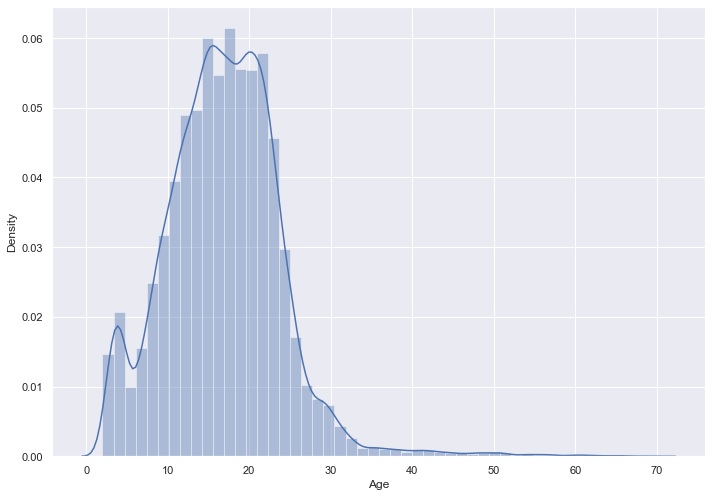

In [37]:
#Visualizing parameters
sns.distplot(cars['Age'])

<AxesSubplot:xlabel='price', ylabel='Density'>

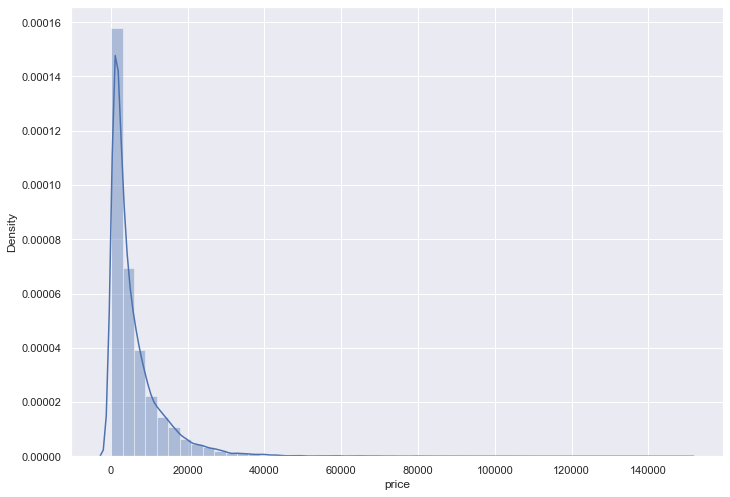

In [38]:
sns.distplot(cars['price'])

<AxesSubplot:xlabel='powerPS', ylabel='Density'>

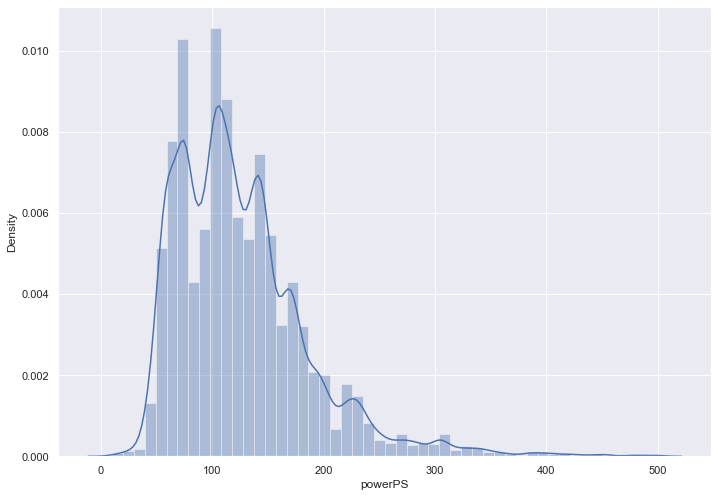

In [39]:
sns.distplot(cars['powerPS'])

<AxesSubplot:ylabel='Age'>

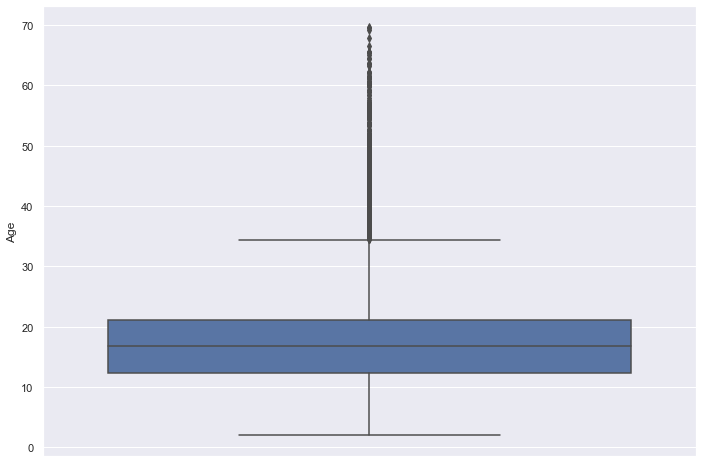

In [40]:
sns.boxplot(y=cars['Age'])

<AxesSubplot:ylabel='price'>

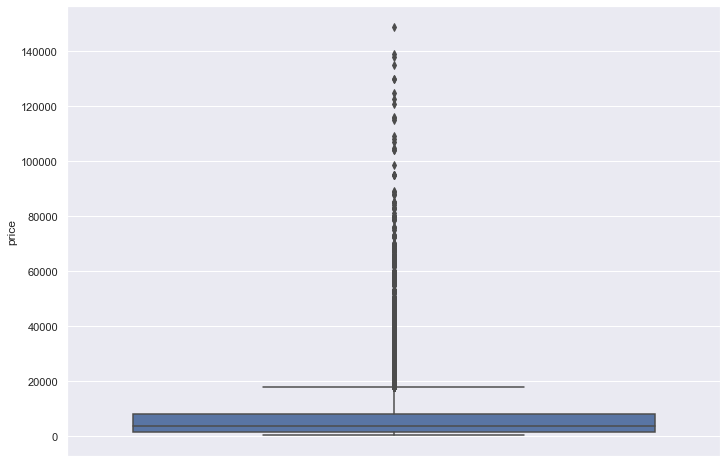

In [41]:
sns.boxplot(y=cars['price'])

<AxesSubplot:ylabel='powerPS'>

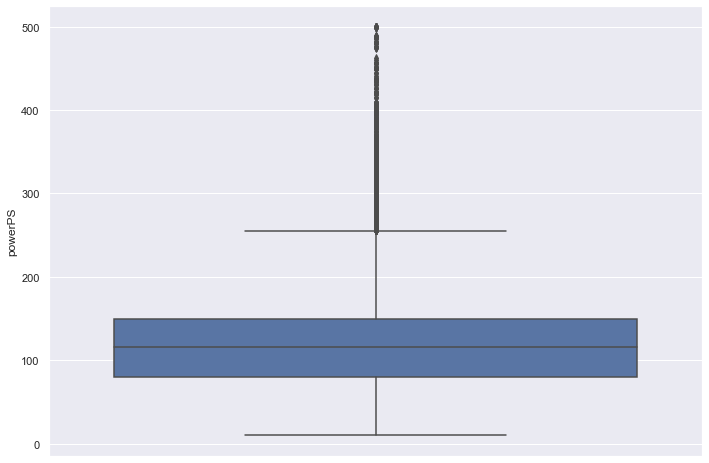

In [42]:
sns.boxplot(y=cars['powerPS'])

<AxesSubplot:xlabel='Age', ylabel='price'>

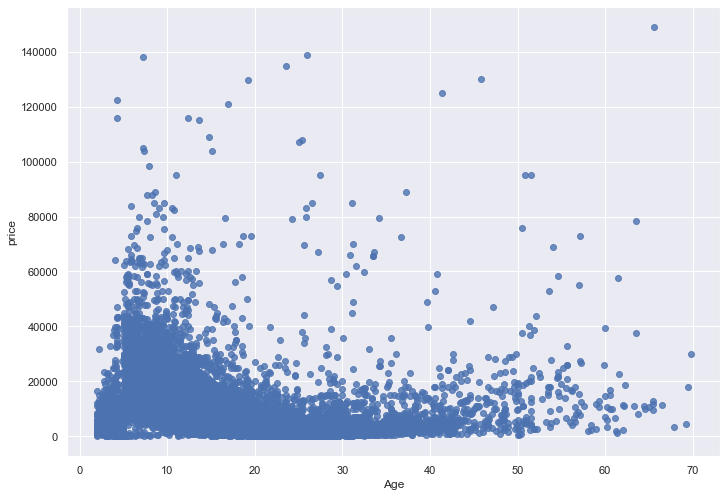

In [43]:
#age vs price
sns.regplot(x='Age',y='price',data=cars,scatter=True,fit_reg=False)

<AxesSubplot:xlabel='powerPS', ylabel='price'>

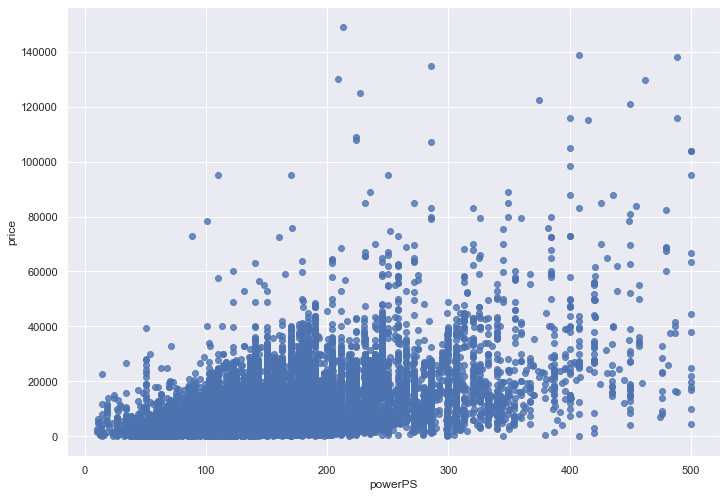

In [44]:
#powerPS vs rice
sns.regplot(x='powerPS',y='price',data=cars,scatter=True,fit_reg=False)

In [45]:
#variable seller
cars['seller'].value_counts()

private       42771
commercial        1
Name: seller, dtype: int64

In [46]:
pd.crosstab(cars['seller'],columns='count',normalize=True)

col_0,count
seller,
commercial,0.000
private,1.000


<AxesSubplot:xlabel='seller', ylabel='count'>

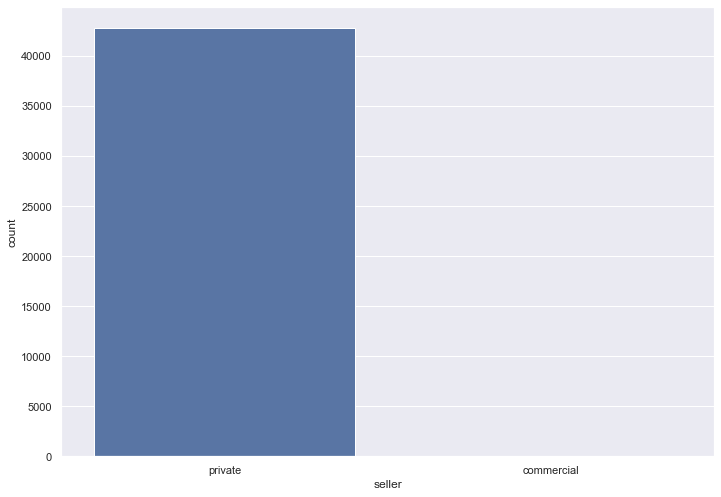

In [47]:
sns.countplot(cars['seller'])

In [48]:
#seller does not affect price 

In [49]:
#variable offerType
cars['offerType'].value_counts()

offer    42772
Name: offerType, dtype: int64

<AxesSubplot:xlabel='offerType', ylabel='count'>

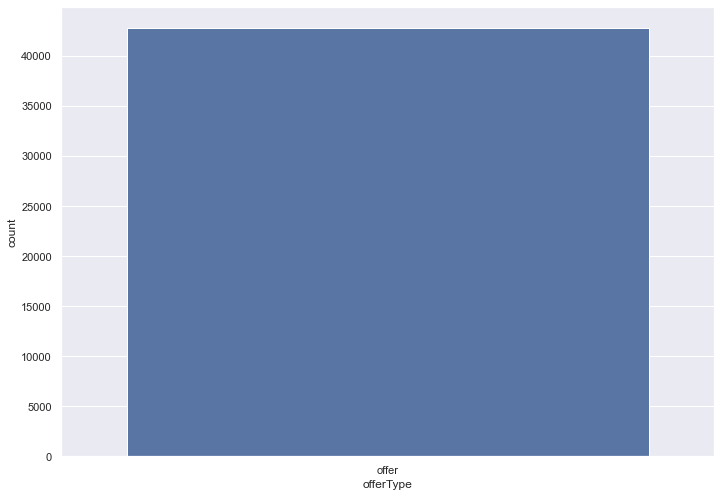

In [50]:
sns.countplot(cars.offerType)

In [51]:
#offerType does not affect price

In [52]:
#variable abtest
cars.abtest.value_counts()

test       22128
control    20644
Name: abtest, dtype: int64

In [53]:
pd.crosstab(cars.abtest,columns='count',normalize=True)

col_0,count
abtest,
control,0.483
test,0.517


<AxesSubplot:xlabel='abtest', ylabel='count'>

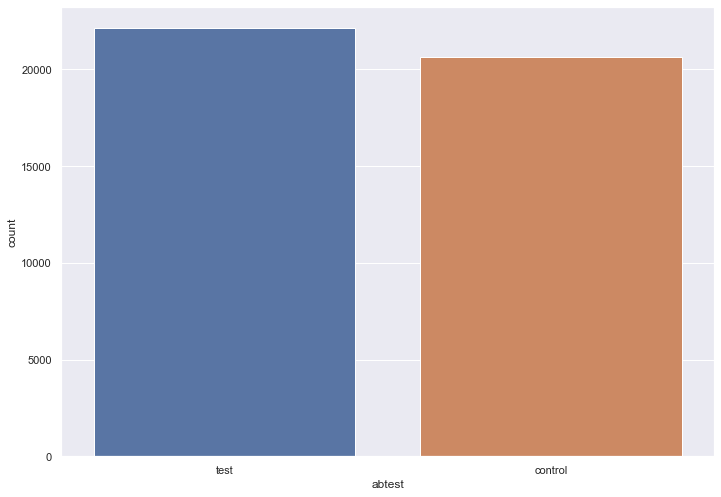

In [54]:
sns.countplot(cars.abtest)

<AxesSubplot:xlabel='abtest', ylabel='price'>

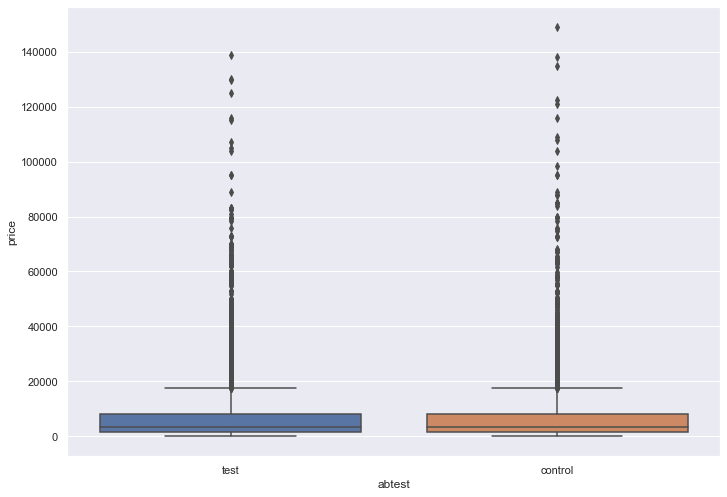

In [55]:
sns.boxplot(x='abtest',y='price',data =cars)

In [56]:
#abtest does not affect price

In [57]:
#variable vehicleType
cars['vehicleType'].value_counts()

limousine        11746
small car         9285
station wagon     8076
bus               3597
cabrio            2792
coupe             2261
suv               1813
others             326
Name: vehicleType, dtype: int64

In [58]:
pd.crosstab(cars['vehicleType'],columns='count',normalize=True)

col_0,count
vehicleType,
bus,0.090
cabrio,0.070
coupe,0.057
limousine,0.294
others,0.008
small car,0.233
station wagon,0.202
suv,0.045


<AxesSubplot:xlabel='vehicleType', ylabel='count'>

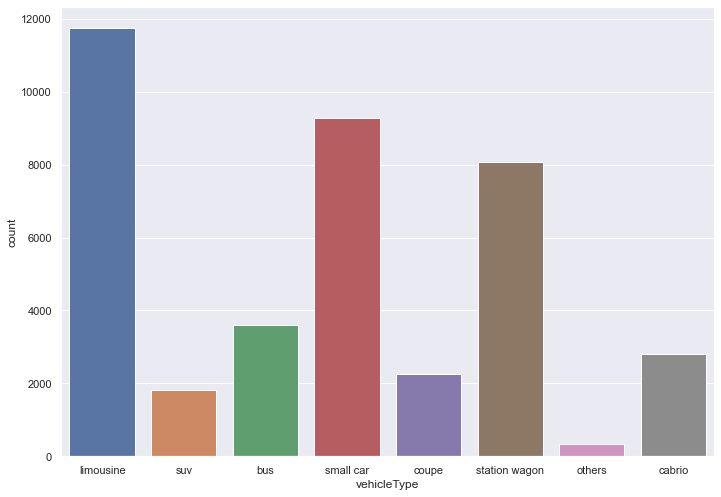

In [59]:
sns.countplot(cars.vehicleType)

<AxesSubplot:xlabel='vehicleType', ylabel='price'>

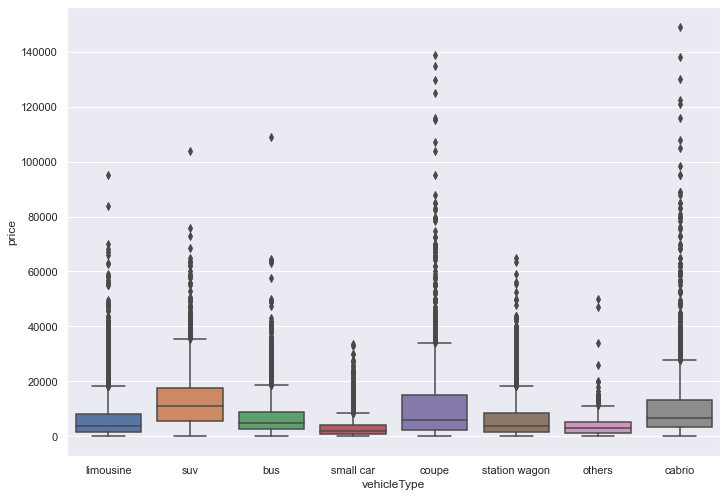

In [60]:
sns.boxplot(x='vehicleType',y='price',data=cars)

In [61]:
#vehicleType affects price

In [62]:
#variabel gearbox
cars['gearbox'].value_counts()

manual       32582
automatic     9396
Name: gearbox, dtype: int64

In [63]:
pd.crosstab(cars['gearbox'],columns='count',normalize=True)

col_0,count
gearbox,
automatic,0.224
manual,0.776


<AxesSubplot:xlabel='gearbox', ylabel='count'>

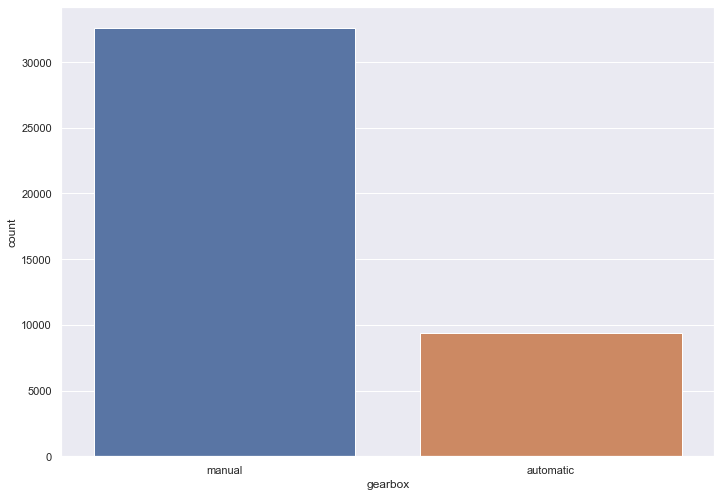

In [64]:
sns.countplot(cars['gearbox'])

<AxesSubplot:xlabel='gearbox', ylabel='price'>

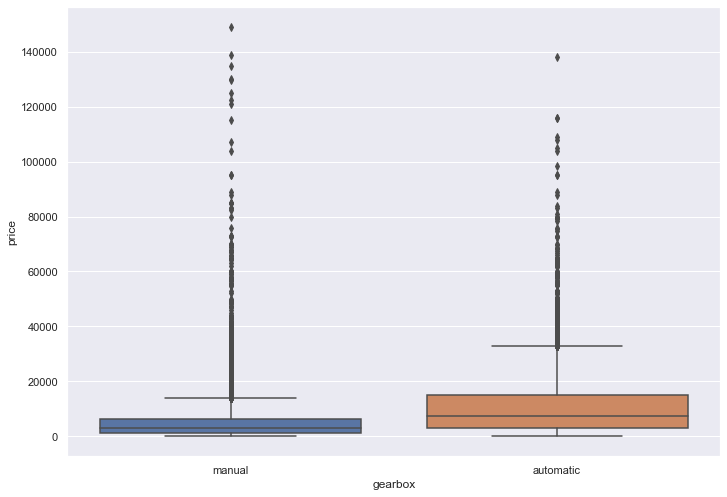

In [65]:
sns.boxplot(x='gearbox',y='price',data=cars)

In [66]:
#gearbox affects price 

In [67]:
#variable kilometer
cars['kilometer'].value_counts()

150000    27430
125000     4597
100000     1824
90000      1484
80000      1378
70000      1182
60000      1101
50000       932
40000       795
30000       712
20000       651
5000        479
10000       207
Name: kilometer, dtype: int64

In [68]:
pd.crosstab(cars['kilometer'],columns='count',normalize=True)

col_0,count
kilometer,
5000,0.011
10000,0.005
20000,0.015
30000,0.017
40000,0.019
50000,0.022
60000,0.026
70000,0.028
80000,0.032


<AxesSubplot:xlabel='kilometer', ylabel='count'>

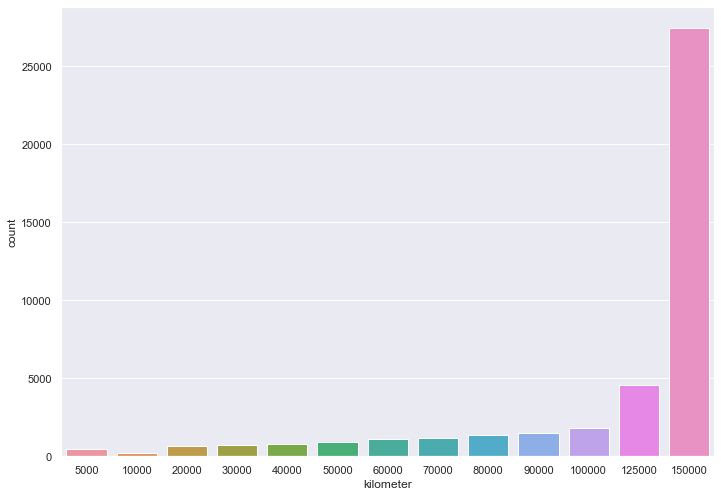

In [69]:
sns.countplot(cars['kilometer'])

<AxesSubplot:xlabel='kilometer', ylabel='price'>

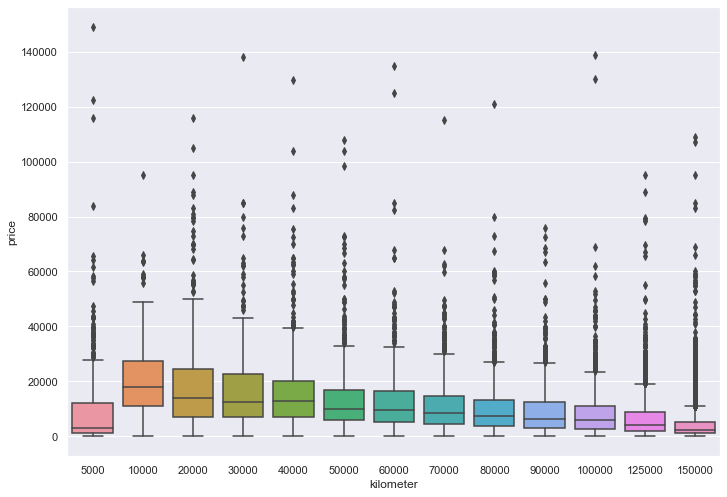

In [70]:
sns.boxplot(x='kilometer',y='price',data=cars)

In [71]:
cars.kilometer.describe()

count    42772.000
mean    125815.253
std      39078.120
min       5000.000
25%     100000.000
50%     150000.000
75%     150000.000
max     150000.000
Name: kilometer, dtype: float64

<AxesSubplot:xlabel='kilometer'>

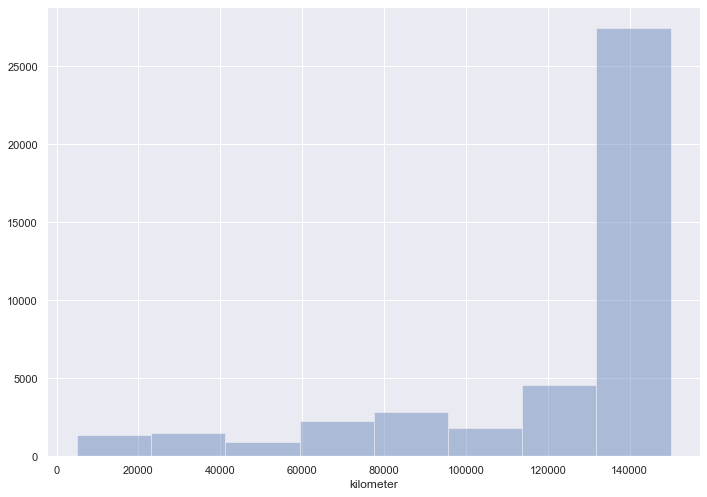

In [72]:
sns.distplot(cars['kilometer'],bins=8,kde=False)

In [73]:
#kilometer affects price

In [74]:
#variable fuelType
cars['fuelType'].value_counts()

petrol     26509
diesel     12854
lpg          690
cng           70
hybrid        36
electro       10
other          6
Name: fuelType, dtype: int64

In [75]:
pd.crosstab(cars['fuelType'],columns='count',normalize=True)

col_0,count
fuelType,
cng,0.002
diesel,0.320
electro,0.000
hybrid,0.001
lpg,0.017
other,0.000
petrol,0.660


<AxesSubplot:xlabel='fuelType', ylabel='count'>

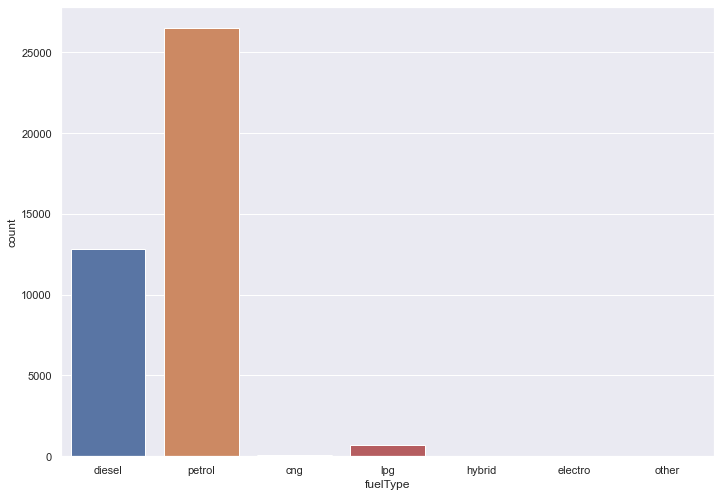

In [76]:
sns.countplot(cars['fuelType'])

<AxesSubplot:xlabel='fuelType', ylabel='price'>

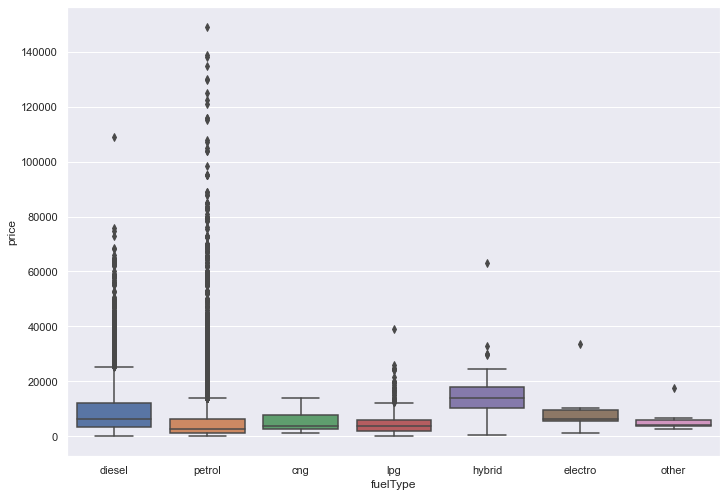

In [77]:
sns.boxplot(x='fuelType',y='price',data=cars)

In [78]:
#fuelTpe affects price

In [79]:
#variable brand
cars['brand'].value_counts()

volkswagen        9134
bmw               4868
opel              4487
mercedes_benz     4134
audi              3984
ford              2815
renault           1941
peugeot           1323
fiat               996
seat               886
skoda              698
mazda              663
smart              623
nissan             601
citroen            598
toyota             547
volvo              429
mini               428
hyundai            406
mitsubishi         359
honda              300
sonstige_autos     299
kia                276
suzuki             264
porsche            260
alfa_romeo         245
chevrolet          213
chrysler           151
dacia              123
subaru             112
jeep                91
land_rover          81
jaguar              78
daihatsu            67
saab                65
lancia              56
daewoo              53
rover               53
trabant             43
lada                22
Name: brand, dtype: int64

In [80]:
pd.crosstab(cars['brand'],columns='count',normalize=True)

col_0,count
brand,
alfa_romeo,0.006
audi,0.093
bmw,0.114
chevrolet,0.005
chrysler,0.004
citroen,0.014
dacia,0.003
daewoo,0.001
daihatsu,0.002


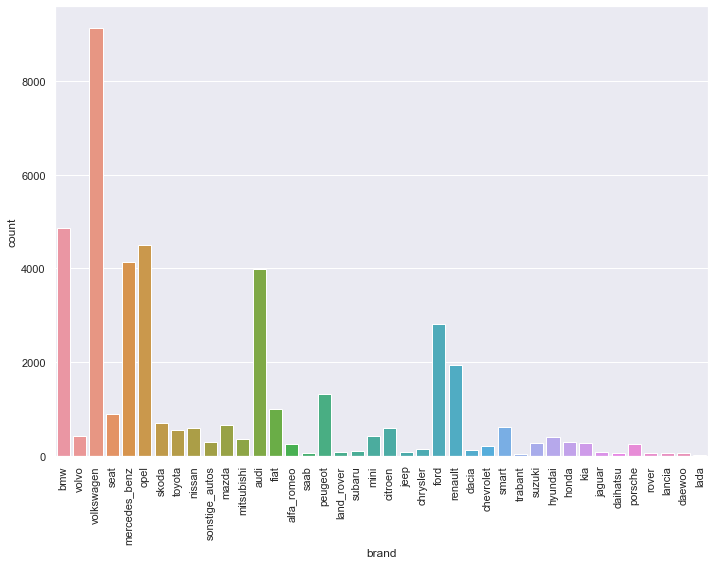

In [81]:
sns.countplot(cars['brand'])
p=plt.xticks(rotation=90)

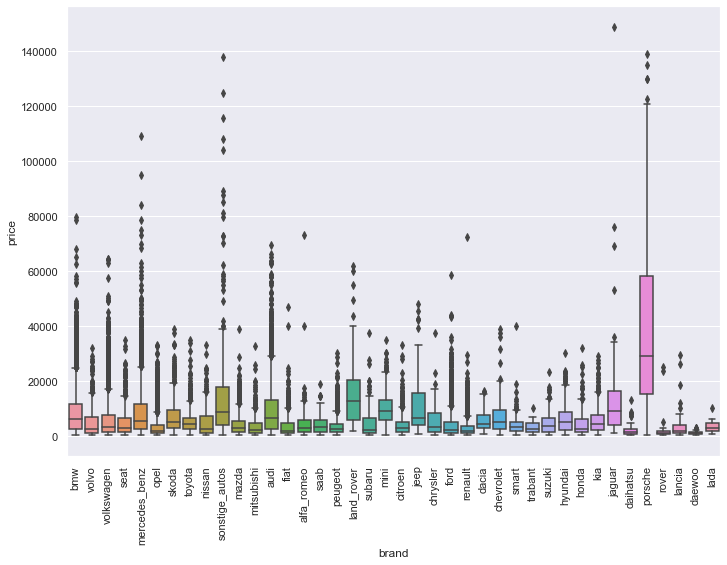

In [82]:
sns.boxplot(x='brand',y='price',data=cars)
p=plt.xticks(rotation=90)

In [83]:
#brand affects price

In [84]:
#variable notRepairedDamage
cars.notRepairedDamage.value_counts()

no     32507
yes     3988
Name: notRepairedDamage, dtype: int64

In [85]:
pd.crosstab(cars['notRepairedDamage'],columns='count',normalize=True)

col_0,count
notRepairedDamage,
no,0.891
yes,0.109


<AxesSubplot:xlabel='notRepairedDamage', ylabel='count'>

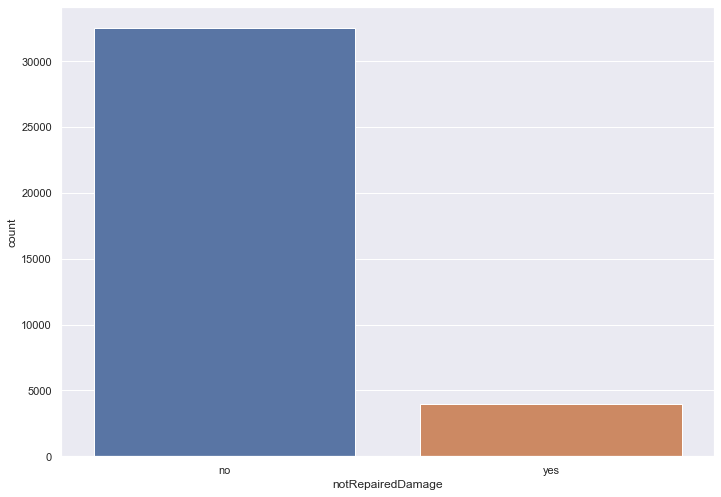

In [86]:
sns.countplot(cars['notRepairedDamage'])

<AxesSubplot:xlabel='notRepairedDamage', ylabel='price'>

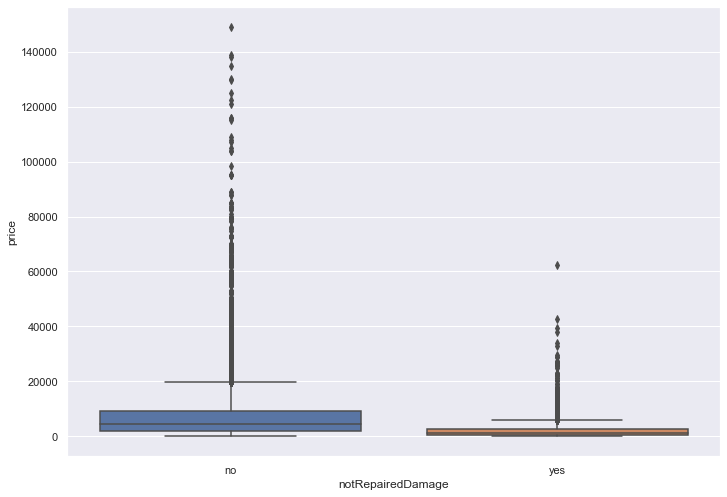

In [87]:
sns.boxplot(x='notRepairedDamage',y='price',data=cars)

In [88]:
#notRepairedDamage affects price

In [89]:
#removing insignificant columns
c=['seller','offerType','abtest']
cars=cars.drop(columns=c,axis=1)

In [90]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42772 entries, 0 to 50000
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              42772 non-null  int64  
 1   vehicleType        39896 non-null  object 
 2   gearbox            41978 non-null  object 
 3   powerPS            42772 non-null  int64  
 4   model              41089 non-null  object 
 5   kilometer          42772 non-null  int64  
 6   fuelType           40175 non-null  object 
 7   brand              42772 non-null  object 
 8   notRepairedDamage  36495 non-null  object 
 9   Age                42772 non-null  float64
dtypes: float64(1), int64(3), object(6)
memory usage: 4.6+ MB


In [91]:
#drpping missing values
co=cars.dropna(axis=0)
co.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32884 entries, 1 to 50000
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              32884 non-null  int64  
 1   vehicleType        32884 non-null  object 
 2   gearbox            32884 non-null  object 
 3   powerPS            32884 non-null  int64  
 4   model              32884 non-null  object 
 5   kilometer          32884 non-null  int64  
 6   fuelType           32884 non-null  object 
 7   brand              32884 non-null  object 
 8   notRepairedDamage  32884 non-null  object 
 9   Age                32884 non-null  float64
dtypes: float64(1), int64(3), object(6)
memory usage: 2.8+ MB


In [92]:
#correlation
cs=cars.select_dtypes(exclude=[object])
cor=cs.corr()
cor

,price,powerPS,kilometer,Age
price,1.000,0.575,-0.440,-0.336
powerPS,0.575,1.000,-0.016,-0.151
kilometer,-0.440,-0.016,1.000,0.292
Age,-0.336,-0.151,0.292,1.000


In [93]:
#cs.corr().loc[:,'price'].abs().sort_values(ascending=False)[1:]

In [94]:
#converting car data to numeric
co=pd.get_dummies(co,drop_first=True)

In [95]:
co.describe()

,price,powerPS,kilometer,Age,vehicleType_cabrio,vehicleType_coupe,vehicleType_limousine,vehicleType_others,vehicleType_small car,vehicleType_station wagon,vehicleType_suv,gearbox_manual,model_147,model_156,model_159,model_1_reihe,model_1er,model_200,model_2_reihe,model_300c,model_3_reihe,model_3er,model_4_reihe,model_500,model_5_reihe,model_5er,model_601,model_6_reihe,model_6er,model_7er,model_80,model_850,model_90,model_900,model_9000,model_911,model_a1,model_a2,model_a3,model_a4,model_a5,model_a6,model_a8,model_a_klasse,model_accord,model_agila,model_alhambra,model_almera,model_altea,model_amarok,model_antara,model_arosa,model_astra,model_auris,model_avensis,model_aveo,model_aygo,model_b_klasse,model_b_max,model_beetle,model_berlingo,model_bora,model_boxster,model_bravo,model_c1,model_c2,model_c3,model_c4,model_c5,model_c_klasse,model_c_max,model_c_reihe,model_caddy,model_calibra,model_captiva,model_carisma,model_carnival,model_cayenne,model_cc,model_ceed,model_charade,model_cherokee,model_citigo,model_civic,model_cl,model_clio,model_clk,model_clubman,model_colt,model_combo,model_cooper,model_cordoba,model_corolla,model_corsa,model_cr_reihe,model_croma,model_crossfire,model_cuore,model_cx_reihe,model_defender,model_delta,model_discovery,model_doblo,model_ducato,model_duster,model_e_klasse,model_eos,model_escort,model_espace,model_exeo,model_fabia,model_fiesta,model_focus,model_forester,model_forfour,model_fortwo,model_fox,model_freelander,model_fusion,model_g_klasse,model_galant,model_galaxy,model_getz,model_gl,model_glk,model_golf,model_grand,model_i3,model_i_reihe,model_ibiza,model_impreza,model_insignia,model_jazz,model_jetta,model_jimny,model_juke,model_justy,model_ka,model_kadett,model_kaefer,model_kalina,model_kalos,model_kangoo,model_kuga,model_laguna,model_lancer,model_lanos,model_legacy,model_leon,model_lodgy,model_logan,model_lupo,model_lybra,model_m_klasse,model_m_reihe,model_materia,model_matiz,model_megane,model_meriva,model_micra,model_mii,model_modus,model_mondeo,model_move,model_musa,model_mustang,model_mx_reihe,model_navara,model_niva,model_note,model_nubira,model_octavia,model_omega,model_one,model_others,model_outlander,model_pajero,model_panda,model_passat,model_phaeton,model_picanto,model_polo,model_primera,model_ptcruiser,model_punto,model_q3,model_q5,model_q7,model_qashqai,model_r19,model_range_rover,model_range_rover_evoque,model_range_rover_sport,model_rangerover,model_rav,model_rio,model_roadster,model_roomster,model_rx_reihe,model_s60,model_s_klasse,model_s_max,model_s_type,model_sandero,model_santa,model_scenic,model_scirocco,model_seicento,model_serie_2,model_serie_3,model_sharan,model_signum,model_sirion,model_sl,model_slk,model_sorento,model_spark,model_spider,model_sportage,model_sprinter,model_stilo,model_superb,model_swift,model_terios,model_tigra,model_tiguan,model_toledo,model_touareg,model_touran,model_transit,model_transporter,model_tt,model_tucson,model_twingo,model_up,model_v40,model_v50,model_v60,model_v70,model_v_klasse,model_vectra,model_verso,model_viano,model_vito,model_vivaro,model_voyager,model_wrangler,model_x_reihe,model_x_trail,model_x_type,model_xc_reihe,model_yaris,model_yeti,model_ypsilon,model_z_reihe,model_zafira,fuelType_diesel,fuelType_electro,fuelType_hybrid,fuelType_lpg,fuelType_other,fuelType_petrol,brand_audi,brand_bmw,brand_chevrolet,brand_chrysler,brand_citroen,brand_dacia,brand_daewoo,brand_daihatsu,brand_fiat,brand_ford,brand_honda,brand_hyundai,brand_jaguar,brand_jeep,brand_kia,brand_lada,brand_lancia,brand_land_rover,brand_mazda,brand_mercedes_benz,brand_mini,brand_mitsubishi,brand_nissan,brand_opel,brand_peugeot,brand_porsche,brand_renault,brand_rover,brand_saab,brand_seat,brand_skoda,brand_smart,brand_subaru,brand_suzuki,brand_toyota,brand_trabant,brand_volkswagen,brand_volvo,notRepairedDamage_yes
count,32884.000,32884.000,32884.000,32884.000,32884.000,32884.000,32884.000,32884.000,32884.000,32884.000,32884.000,32884.000,32884.000,32884.000,32884.000,32884.

In [96]:
#for prediction
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression as lr
from sklearn.ensemble import RandomForestRegressor as rf
from sklearn.metrics import mean_squared_error as mse

In [97]:
#build model
x=co.drop(['price'],axis='columns',inplace=False)
y=co['price']

array([[<AxesSubplot:title={'center':'1.Before'}>,
        <AxesSubplot:title={'center':'2.After'}>]], dtype=object)

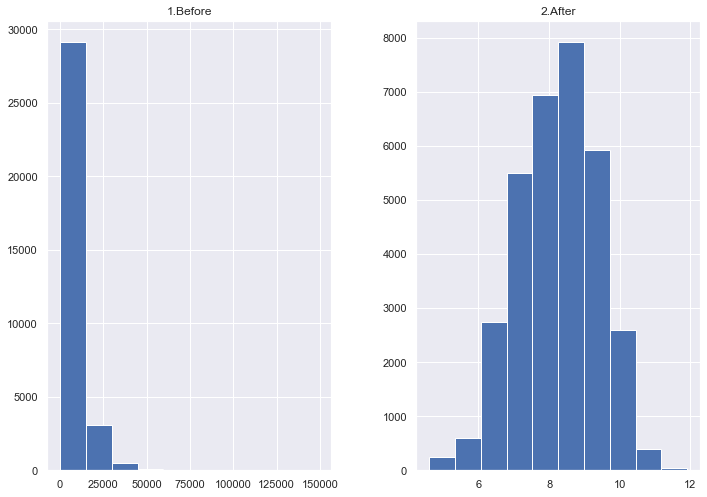

In [98]:
#plot for variable price
price1=pd.DataFrame({'1.Before':y,'2.After':np.log(y)})
price1.hist()

In [99]:
#transforming y to log(y)
y=np.log(y)

In [100]:
#splitting data
x_train,x_test,y_train,y_test=tts(x,y,test_size=0.3,random_state=3)

In [101]:
#baseline model=> to set benchmark
base_p=np.mean(y_test)
#repeat till length of y_test
base_p=np.repeat(base_p,len(y_test))
base_p

array([8.24961579, 8.24961579, 8.24961579, ..., 8.24961579, 8.24961579,
       8.24961579])

In [102]:
#base root mean squared error
base_rmse=np.sqrt(mse(y_test,base_p))
base_rmse

1.1274483657478247

In [103]:
#linear regression
#instance of model
l=lr(fit_intercept=True)
#fitting data to model
ml=l.fit(x_train,y_train)
#predicting 
pl=l.predict(x_test)

In [104]:
#mean squared error and root mean squared error
l_mse=mse(y_test,pl)
l_mse

0.297622758492835

In [105]:
l_rmse=np.sqrt(l_mse)
l_rmse

0.5455481266513844

In [106]:
#R-squared value
r2_test=ml.score(x_test,y_test)
r2_train=ml.score(x_train,y_train)
print(r2_test,r2_train)

0.765861509164924 0.7800936978183916


<AxesSubplot:ylabel='price'>

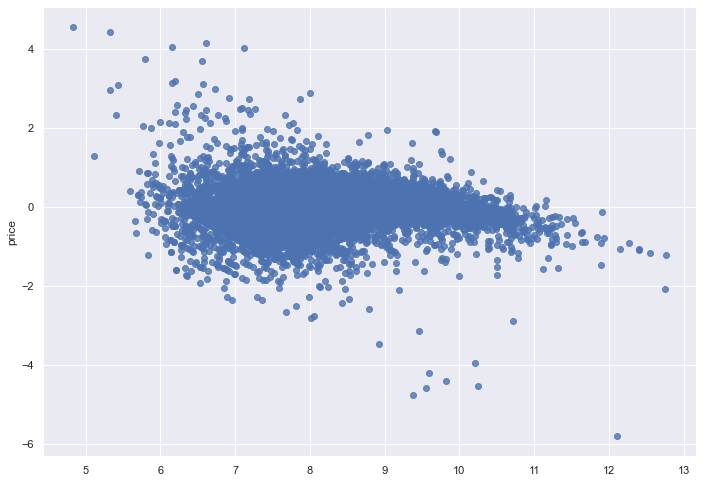

In [107]:
#regression diagnostics: residuals=>difference between predicted value and actual value
resid_1=y_test-pl
sns.regplot(scatter=True,fit_reg=False,x=pl,y=resid_1)

In [108]:
resid_1.describe()

count   9866.000
mean       0.003
std        0.546
min       -5.796
25%       -0.261
50%        0.041
75%        0.302
max        4.547
Name: price, dtype: float64

In [109]:
#random forest
#instance of model
r=rf(n_estimators=100,max_features='auto',max_depth=100,min_samples_split=10,min_samples_leaf=4,random_state=1)
#fitting data to model
mr=r.fit(x_train,y_train)
#predicting
pr=r.predict(x_test)

In [110]:
#mean squared error and root mean squared error
r_mse=mse(y_test,pr)
r_mse

0.19013681245838282

In [111]:
r_rmse=np.sqrt(r_mse)
r_rmse

0.4360468007661366

In [112]:
#R-squared value
r2_test1=mr.score(x_test,y_test)
r2_train1=mr.score(x_train,y_train)
print(r2_test1,r2_train1)

0.8504202214016192 0.9202494705146291


In [113]:
#model building with filled missing values
ci=cars.apply(lambda x:x.fillna(x.median()) if x.dtype=='float' else x.fillna(x.value_counts().index[0]))

In [114]:
ci.isna().sum()

price                0
vehicleType          0
gearbox              0
powerPS              0
model                0
kilometer            0
fuelType             0
brand                0
notRepairedDamage    0
Age                  0
dtype: int64

In [115]:
#converting data to numeric
ci=pd.get_dummies(ci,drop_first=True)

In [116]:
#build model
x2=ci.drop(['price'],axis='columns',inplace=False)
y2=ci['price']

array([[<AxesSubplot:title={'center':'1.Before'}>,
        <AxesSubplot:title={'center':'2.After'}>]], dtype=object)

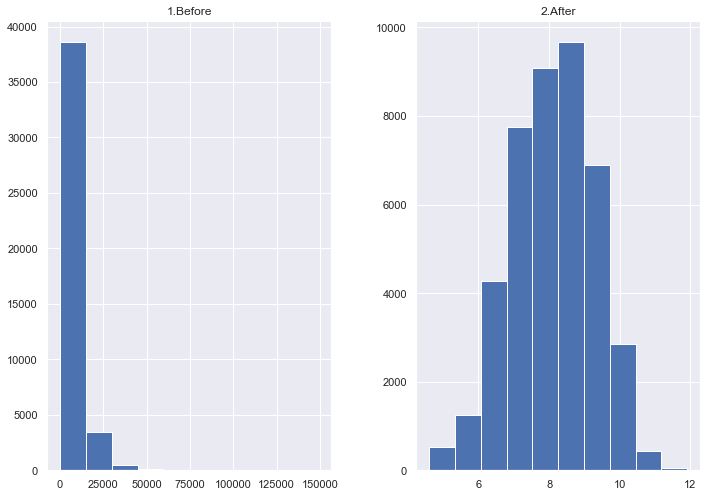

In [117]:
price2=pd.DataFrame({'1.Before':y2,'2.After':np.log(y2)})
price2.hist()

In [118]:
#transforming y2
y2=np.log(y2)

In [119]:
#split data
x_train2,x_test2,y_train2,y_test2=tts(x2,y2,test_size=0.3,random_state=3)

In [120]:
#baseline model
base_p2=np.mean(y_test2)
base_p2=np.repeat(base_p2,len(y_test2))

In [121]:
#base rmse
base_rmse2=np.sqrt(mse(y_test2,base_p2))
base_rmse2

1.1884349112889792

In [122]:
#linear regression
l2=lr(fit_intercept=True)
ml2=l2.fit(x_train2,y_train2)
pl2=l2.predict(x_test2)

In [123]:
#mean squared error and root mean squared error
l2_mse=mse(y_test2,pl2)
l2_mse

0.42041691235528117

In [124]:
l2_rmse=np.sqrt(l2_mse)
l2_rmse

0.6483956449231296

In [125]:
#R-squared value
r2_test2=ml2.score(x_test2,y_test2)
r2_train2=ml2.score(x_train2,y_train2)
print(r2_test2,r2_train2)

0.7023339008631184 0.7071658736894363


In [126]:
#random forest
r2=rf(n_estimators=100,max_features='auto',max_depth=100,min_samples_split=10,min_samples_leaf=4,random_state=1)
mr2=r2.fit(x_train2,y_train2)
pr2=r2.predict(x_test2)

In [127]:
#mean squared error and root mean squared error
r2_mse=mse(y_test2,pr2)
r2_mse

0.2443473181204275

In [128]:
r2_rmse=np.sqrt(r2_mse)
r2_rmse

0.49431499888272407

In [129]:
r2_train3=mr2.score(x_train2,y_train2)
r2_test3=mr2.score(x_test2,y_test2)
print(r2_test3,r2_train3)

0.8269957490244799 0.9024286553575759


In [130]:
#final output
print("Metrics for models built from data where missing values are dropped")
print()
print("R square value for train from linear regression ",r2_train)
print("R square value for test from linear regression ",r2_test)
print("R square value for train from random forest ",r2_train1)
print("R square value for test from random forest ",r2_test1)
print("Base RMSE ",base_rmse)
print("RMSE value for test for linear regression ",l_rmse)
print("RMSE value for test for random forest ",r_rmse)
print()
print()
print("Metrics for models built from data where missing values are filled")
print()
print("R square value for train from linear regression ",r2_train2)
print("R square value for test from linear regression ",r2_test2)
print("R square value for train from random forest ",r2_train3)
print("R square value for test from random forest ",r2_test3)
print("Base RMSE ",base_rmse2)
print("RMSE value for test for linear regression",l2_rmse)
print("RMSE value for test for random forest",r2_rmse)


Metrics for models built from data where missing values are dropped

R square value for train from linear regression  0.7800936978183916
R square value for test from linear regression  0.765861509164924
R square value for train from random forest  0.9202494705146291
R square value for test from random forest  0.8504202214016192
Base RMSE  1.1274483657478247
RMSE value for test for linear regression  0.5455481266513844
RMSE value for test for random forest  0.4360468007661366


Metrics for models built from data where missing values are filled

R square value for train from linear regression  0.7071658736894363
R square value for test from linear regression  0.7023339008631184
R square value for train from random forest  0.9024286553575759
R square value for test from random forest  0.8269957490244799
Base RMSE  1.1884349112889792
RMSE value for test for linear regression 0.6483956449231296
RMSE value for test for random forest 0.49431499888272407
